In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df = pd.read_csv('/mnt/44D2A11AD2A1116A/Studies/INSI/M1/DOCKER/Project/Car Price.csv')

In [60]:
pd.set_option('display.max_columns', None)
df.head(10)

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Is_First_Owner
0,Maruti,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,1
1,Maruti,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,1
2,Hyundai,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,1
3,Datsun,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,1
4,Honda,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,0
5,Maruti,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,1
6,Hyundai,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,1
7,Tata,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,0
8,Hyundai,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,1
9,Maruti,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,1


In [30]:
# Optionnel : un style plus clean
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

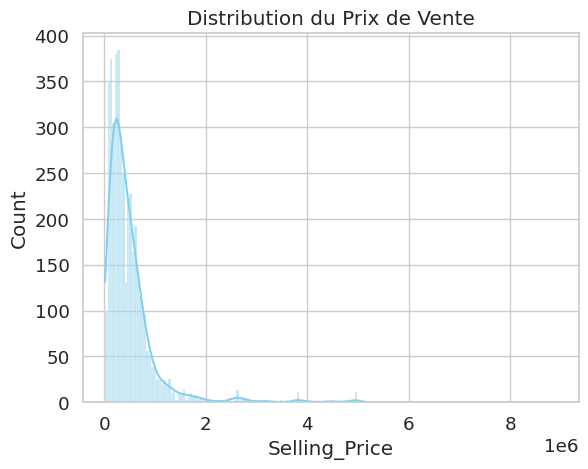

In [31]:
sns.histplot(df['Selling_Price'], kde=True, color='skyblue')
plt.title('Distribution du Prix de Vente')
plt.show()

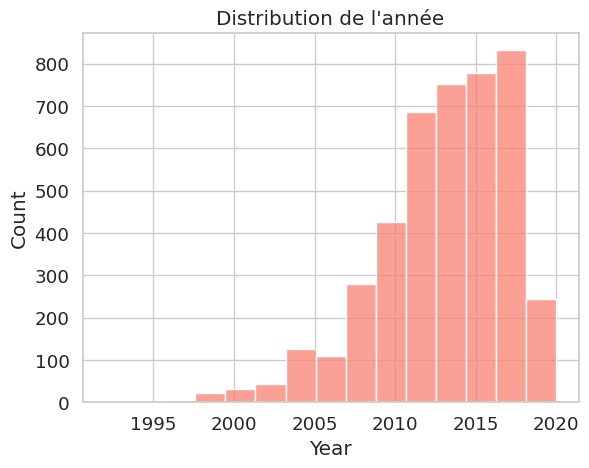

In [32]:
sns.histplot(df['Year'], bins=15, color='salmon')
plt.title('Distribution de l\'année')
plt.show()

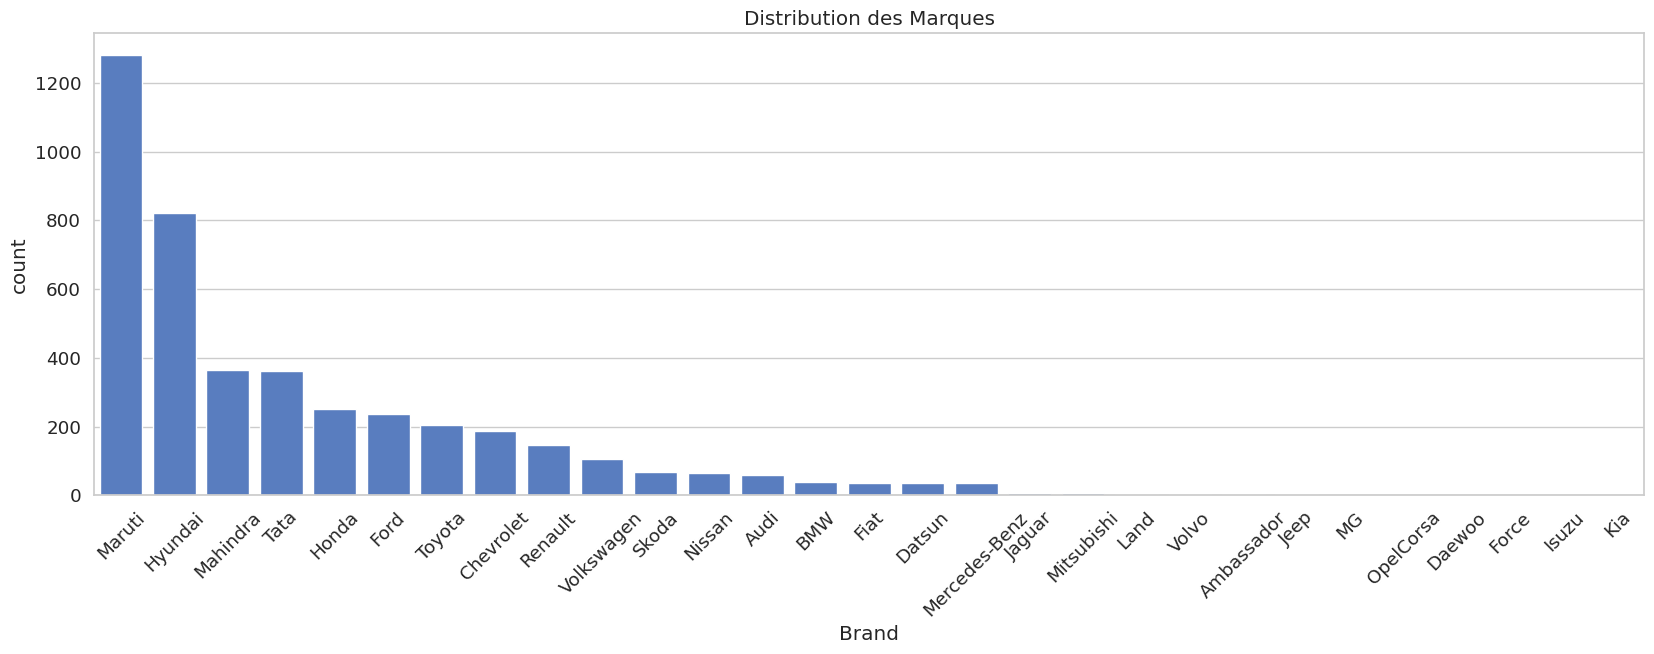

In [33]:
plt.figure(figsize=(20,6))
sns.countplot(x='Brand', data=df, order=df['Brand'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution des Marques')
plt.show()

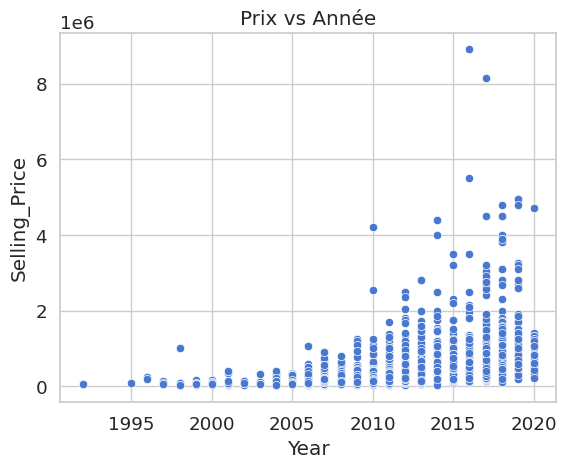

In [34]:
sns.scatterplot(x='Year', y='Selling_Price', data=df)
plt.title('Prix vs Année')
plt.show()

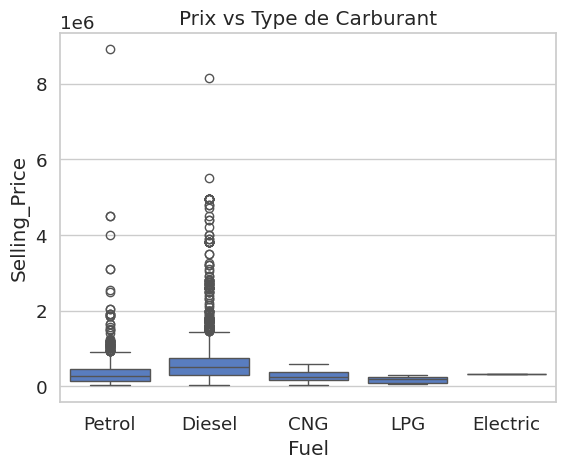

In [35]:
sns.boxplot(x='Fuel', y='Selling_Price', data=df)
plt.title('Prix vs Type de Carburant')
plt.show()

In [36]:
df['Model'].nunique()

1491

In [37]:
#df = df.drop(columns=['Model'])
df.head()

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,Maruti,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [59]:
df['Model'].unique().tolist()

['Maruti 800 AC',
 'Maruti Wagon R LXI Minor',
 'Hyundai Verna 1.6 SX',
 'Datsun RediGO T Option',
 'Honda Amaze VX i-DTEC',
 'Maruti Alto LX BSIII',
 'Hyundai Xcent 1.2 Kappa S',
 'Tata Indigo Grand Petrol',
 'Hyundai Creta 1.6 VTVT S',
 'Maruti Celerio Green VXI',
 'Chevrolet Sail 1.2 Base',
 'Toyota Corolla Altis 1.8 VL CVT',
 'Maruti Ciaz VXi Plus',
 'Hyundai Venue SX Opt Diesel',
 'Chevrolet Enjoy TCDi LTZ 7 Seater',
 'Jaguar XF 2.2 Litre Luxury',
 'Mercedes-Benz New C-Class 220 CDI AT',
 'Maruti Vitara Brezza ZDi Plus AMT',
 'Audi Q5 2.0 TDI',
 'Honda City V MT',
 'Tata Tigor 1.2 Revotron XT',
 'Audi A6 2.0 TDI  Design Edition',
 'Mercedes-Benz New C-Class C 220 CDI Avantgarde',
 'Skoda Superb Ambition 2.0 TDI CR AT',
 'Toyota Corolla Altis G AT',
 'Toyota Innova 2.5 G (Diesel) 7 Seater',
 'Jeep Compass 1.4 Sport Plus BSIV',
 'Mercedes-Benz E-Class E 200 CGI Elegance',
 'Hyundai i10 Magna 1.1L',
 'BMW 3 Series 320d Sport Line',
 'Audi Q7 35 TDI Quattro Premium',
 'Hyundai Elantra

In [38]:
df['Seller_Type'].value_counts()

Seller_Type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64

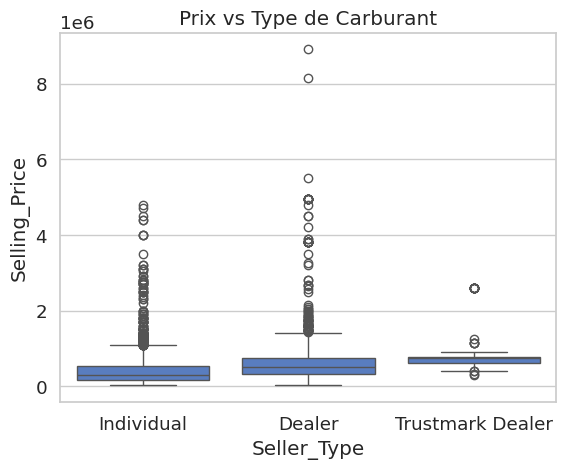

In [39]:
sns.boxplot(x='Seller_Type', y='Selling_Price', data=df)
plt.title('Prix vs Type de Carburant')
plt.show()

In [40]:
df['Owner'].value_counts()

Owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64

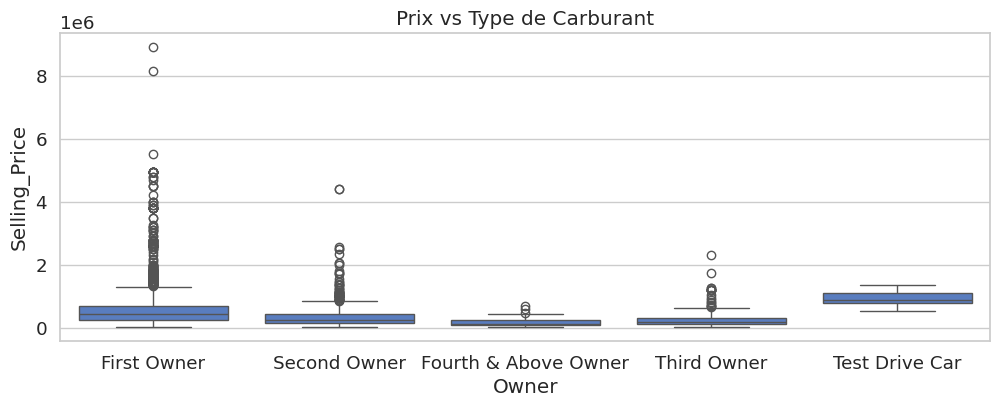

In [41]:
plt.figure(figsize=(12,4))
sns.boxplot(x='Owner', y='Selling_Price', data=df)
plt.title('Prix vs Type de Carburant')
plt.show()

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          4340 non-null   object
 1   Model          4340 non-null   object
 2   Year           4340 non-null   int64 
 3   Selling_Price  4340 non-null   int64 
 4   KM_Driven      4340 non-null   int64 
 5   Fuel           4340 non-null   object
 6   Seller_Type    4340 non-null   object
 7   Transmission   4340 non-null   object
 8   Owner          4340 non-null   object
dtypes: int64(3), object(6)
memory usage: 305.3+ KB


In [ ]:
'''df['Car_Age'] = 2025 - df['Year']
df = df.drop(columns=['Year']) '''

In [43]:
df.head()

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,Maruti,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [44]:
df['Is_First_Owner'] = df['Owner'].apply(lambda x: 1 if x == 'First Owner' else 0)
df = df.drop(columns=['Owner'])

In [45]:
df.head()

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Is_First_Owner
0,Maruti,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,1
1,Maruti,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,1
2,Hyundai,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,1
3,Datsun,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,1
4,Honda,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,0


In [46]:
# 2. Séparation features / cible
X = df.drop(columns=['Selling_Price'])
y = df['Selling_Price']

In [47]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [48]:
# 3. Définition des colonnes catégorielles et numériques
categorical_features = ['Brand', 'Model', 'Fuel', 'Seller_Type', 'Transmission']
numeric_features = [col for col in X.columns if col not in categorical_features]

# 4. Préprocesseur
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # Les colonnes numériques passent telles quelles
)

# 5. Pipeline complet avec modèle
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=101))
])

# 6. Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [49]:
# 7. GridSearch pour optimiser hyperparamètres
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)

# 8. Entraînement avec GridSearch
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/home/mihavana/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END regressor__max_depth=None, regressor__min_samples_split=2, regressor__n_estimators=100; total time=  22.3s


/home/mihavana/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/mihavana/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END regressor__max_depth=None, regressor__min_samples_split=2, regressor__n_estimators=100; total time=  23.7s
[CV] END regressor__max_depth=None, regressor__min_samples_split=2, regressor__n_estimators=100; total time=  23.3s


/home/mihavana/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END regressor__max_depth=None, regressor__min_samples_split=2, regressor__n_estimators=100; total time=  24.3s


/home/mihavana/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END regressor__max_depth=None, regressor__min_samples_split=2, regressor__n_estimators=100; total time=  23.9s


/home/mihavana/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/mihavana/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END regressor__max_depth=None, regressor__min_samples_split=2, regressor__n_estimators=200; total time=  47.2s
[CV] END regressor__max_depth=None, regressor__min_samples_split=2, regressor__n_estimators=200; total time=  48.5s


/home/mihavana/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END regressor__max_depth=None, regressor__min_samples_split=2, regressor__n_estimators=200; total time=  48.9s


/home/mihavana/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END regressor__max_depth=None, regressor__min_samples_split=5, regressor__n_estimators=100; total time=  18.2s


/home/mihavana/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END regressor__max_depth=None, regressor__min_samples_split=5, regressor__n_estimators=100; total time=  21.1s


/home/mihavana/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END regressor__max_depth=None, regressor__min_samples_split=2, regressor__n_estimators=200; total time=  53.7s


/home/mihavana/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END regressor__max_depth=None, regressor__min_samples_split=5, regressor__n_estimators=100; total time=  16.3s


/home/mihavana/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END regressor__max_depth=None, regressor__min_samples_split=5, regressor__n_estimators=100; total time=  18.0s


/home/mihavana/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END regressor__max_depth=None, regressor__min_samples_split=5, regressor__n_estimators=100; total time=  22.6s


/home/mihavana/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END regressor__max_depth=None, regressor__min_samples_split=2, regressor__n_estimators=200; total time=  52.6s


/home/mihavana/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END regressor__max_depth=None, regressor__min_samples_split=5, regressor__n_estimators=200; total time=  38.2s


/home/mihavana/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END regressor__max_depth=None, regressor__min_samples_split=5, regressor__n_estimators=200; total time=  35.6s


/home/mihavana/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END regressor__max_depth=10, regressor__min_samples_split=2, regressor__n_estimators=100; total time=   6.6s


/home/mihavana/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END regressor__max_depth=10, regressor__min_samples_split=2, regressor__n_estimators=100; total time=   7.6s


/home/mihavana/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END regressor__max_depth=None, regressor__min_samples_split=5, regressor__n_estimators=200; total time=  38.4s


/home/mihavana/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END regressor__max_depth=None, regressor__min_samples_split=5, regressor__n_estimators=200; total time=  41.5s


/home/mihavana/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END regressor__max_depth=10, regressor__min_samples_split=2, regressor__n_estimators=100; total time=   5.1s


/home/mihavana/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END regressor__max_depth=10, regressor__min_samples_split=2, regressor__n_estimators=100; total time=   7.4s


/home/mihavana/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END regressor__max_depth=10, regressor__min_samples_split=2, regressor__n_estimators=100; total time=   7.4s


/home/mihavana/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END regressor__max_depth=10, regressor__min_samples_split=2, regressor__n_estimators=200; total time=  11.3s


/home/mihavana/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END regressor__max_depth=10, regressor__min_samples_split=2, regressor__n_estimators=200; total time=  13.3s


/home/mihavana/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END regressor__max_depth=None, regressor__min_samples_split=5, regressor__n_estimators=200; total time=  39.5s


/home/mihavana/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END regressor__max_depth=10, regressor__min_samples_split=2, regressor__n_estimators=200; total time=  15.3s


/home/mihavana/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END regressor__max_depth=10, regressor__min_samples_split=5, regressor__n_estimators=100; total time=   6.1s
[CV] END regressor__max_depth=10, regressor__min_samples_split=5, regressor__n_estimators=100; total time=   4.8s


/home/mihavana/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/mihavana/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END regressor__max_depth=10, regressor__min_samples_split=2, regressor__n_estimators=200; total time=  13.4s


/home/mihavana/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END regressor__max_depth=10, regressor__min_samples_split=2, regressor__n_estimators=200; total time=  14.8s


/home/mihavana/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END regressor__max_depth=10, regressor__min_samples_split=5, regressor__n_estimators=100; total time=   6.3s


/home/mihavana/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END regressor__max_depth=10, regressor__min_samples_split=5, regressor__n_estimators=100; total time=   6.5s


/home/mihavana/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END regressor__max_depth=10, regressor__min_samples_split=5, regressor__n_estimators=100; total time=   6.3s


/home/mihavana/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END regressor__max_depth=10, regressor__min_samples_split=5, regressor__n_estimators=200; total time=  12.0s


/home/mihavana/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END regressor__max_depth=10, regressor__min_samples_split=5, regressor__n_estimators=200; total time=  11.9s


/home/mihavana/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END regressor__max_depth=10, regressor__min_samples_split=5, regressor__n_estimators=200; total time=  13.3s


/home/mihavana/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END regressor__max_depth=10, regressor__min_samples_split=5, regressor__n_estimators=200; total time=  12.3s


/home/mihavana/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END regressor__max_depth=10, regressor__min_samples_split=5, regressor__n_estimators=200; total time=  13.7s


/home/mihavana/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END regressor__max_depth=20, regressor__min_samples_split=2, regressor__n_estimators=100; total time=  12.3s


/home/mihavana/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END regressor__max_depth=20, regressor__min_samples_split=2, regressor__n_estimators=100; total time=  15.6s


/home/mihavana/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END regressor__max_depth=20, regressor__min_samples_split=2, regressor__n_estimators=100; total time=  18.5s


/home/mihavana/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END regressor__max_depth=20, regressor__min_samples_split=2, regressor__n_estimators=100; total time=  14.1s


/home/mihavana/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END regressor__max_depth=20, regressor__min_samples_split=2, regressor__n_estimators=100; total time=  15.7s


/home/mihavana/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END regressor__max_depth=20, regressor__min_samples_split=2, regressor__n_estimators=200; total time=  30.9s


/home/mihavana/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END regressor__max_depth=20, regressor__min_samples_split=2, regressor__n_estimators=200; total time=  29.3s


/home/mihavana/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END regressor__max_depth=20, regressor__min_samples_split=2, regressor__n_estimators=200; total time=  27.4s


/home/mihavana/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END regressor__max_depth=20, regressor__min_samples_split=5, regressor__n_estimators=100; total time=  10.8s


/home/mihavana/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END regressor__max_depth=20, regressor__min_samples_split=2, regressor__n_estimators=200; total time=  36.3s


/home/mihavana/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END regressor__max_depth=20, regressor__min_samples_split=5, regressor__n_estimators=100; total time=  13.7s


/home/mihavana/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END regressor__max_depth=20, regressor__min_samples_split=5, regressor__n_estimators=100; total time=  12.2s


/home/mihavana/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END regressor__max_depth=20, regressor__min_samples_split=5, regressor__n_estimators=100; total time=  11.7s


/home/mihavana/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END regressor__max_depth=20, regressor__min_samples_split=2, regressor__n_estimators=200; total time=  34.8s


/home/mihavana/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END regressor__max_depth=20, regressor__min_samples_split=5, regressor__n_estimators=100; total time=  13.9s


/home/mihavana/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END regressor__max_depth=20, regressor__min_samples_split=5, regressor__n_estimators=200; total time=  25.6s


/home/mihavana/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END regressor__max_depth=20, regressor__min_samples_split=5, regressor__n_estimators=200; total time=  29.3s


/home/mihavana/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END regressor__max_depth=20, regressor__min_samples_split=5, regressor__n_estimators=200; total time=  25.0s


/home/mihavana/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END regressor__max_depth=20, regressor__min_samples_split=5, regressor__n_estimators=200; total time=  27.8s


/home/mihavana/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END regressor__max_depth=20, regressor__min_samples_split=5, regressor__n_estimators=200; total time=  20.1s


/home/mihavana/anaconda3/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['Brand',
                                                                          'Model',
                                                                          'Fuel',
                                                                          'Seller_Type',
                                                                          'Transmission'])])),
                                       ('regressor',
                                        RandomForestRegressor(random_state=101))]),
             n_jobs=-1,
             param_grid={'regressor__max_depth': [None, 10, 20],
                         'regressor__min_samples_split': [2, 5],
                         'regressor__n_estimators': [100, 200]},
             scoring='neg_mean_absolute_error', verbose=2)

In [50]:
print("Meilleur score CV (MAE négatif) :", grid_search.best_score_)

Meilleur score CV (MAE négatif) : -113373.30164430209


In [51]:
best_mae_cv = -grid_search.best_score_
print(f"MAE CV (validation croisée) : {best_mae_cv:.2f}")

MAE CV (validation croisée) : 113373.30


In [52]:
y_pred = grid_search.predict(X_test)
mae_test = mean_absolute_error(y_test, y_pred)
print(f"MAE sur test set : {mae_test:.2f}")

/home/mihavana/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


MAE sur test set : 89006.76


In [53]:
r2_score(y_test, y_pred)

0.9044389598075945

In [55]:
import joblib

#grid_search.best_estimator_ contient tout : préprocessing + meilleur modèle
joblib.dump(grid_search.best_estimator_, '/mnt/44D2A11AD2A1116A/Studies/INSI/M1/DOCKER/Project/Cars_Price/Model/car_price_model.pkl')

['/mnt/44D2A11AD2A1116A/Studies/INSI/M1/DOCKER/Project/Cars_Price/Model/car_price_model.pkl']

In [57]:
model = joblib.load('/mnt/44D2A11AD2A1116A/Studies/INSI/M1/DOCKER/Project/Cars_Price/Model/car_price_model.pkl')

# Exemple prédiction
input_data = pd.DataFrame([{
    'Brand': 'Hyundai',
    'Model' : 'Hyundai Verna 1.6 SX',
    'Fuel': 'Petrol',
    'Seller_Type': 'Individual',
    'Transmission': 'Manual',
    'KM_Driven': 50000,
    'Year': 2015,
    'Is_First_Owner': 1
}])

pred = model.predict(input_data)
print(f"Prix prédit : {pred[0]:.2f}")

Prix prédit : 300434.95
